In [327]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")


In [328]:
df = pd.read_csv("Banks.csv")

In [329]:
df.head()

,author,date,location,bank,star,text,like
0,Kyle,31.08.2023,"Magnolia, TX",merrick_bank,5,Very easy to use to view statements and make o...,NaN
1,Julicia,23.08.2023,"Columbus, GA",merrick_bank,5,Merrick Bank has always been good to me for bu...,NaN
2,Karen,2.06.2023,"Marrero, LA",merrick_bank,4,Times are tough for everyone and I have worked...,3.0
3,Brent,29.03.2023,"Moultrie, GA",merrick_bank,5,I can not asked for a better Credit Card Compa...,3.0
4,Sharon,23.11.2022,"Burnham, IL",merrick_bank,5,Updated on 02/10/2023: I was happy to sign for...,3.0


In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19271 entries, 0 to 19270
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   author    19269 non-null  object 
 1   date      19271 non-null  object 
 2   location  19271 non-null  object 
 3   bank      19271 non-null  object 
 4   star      19271 non-null  int64  
 5   text      19181 non-null  object 
 6   like      17769 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 1.0+ MB


In [331]:
df.isna().sum()

author         2
date           0
location       0
bank           0
star           0
text          90
like        1502
dtype: int64

In [332]:
df.dropna(subset=['author', 'text'], inplace=True)

# Replacing NaN values in 'like' column with 0
df['like'].fillna(0, inplace=True)

In [333]:
# GOOD TO GO
df.isna().sum()

author      0
date        0
location    0
bank        0
star        0
text        0
like        0
dtype: int64

In [334]:
# CLEAR
df.head()

,author,date,location,bank,star,text,like
0,Kyle,31.08.2023,"Magnolia, TX",merrick_bank,5,Very easy to use to view statements and make o...,0.0
1,Julicia,23.08.2023,"Columbus, GA",merrick_bank,5,Merrick Bank has always been good to me for bu...,0.0
2,Karen,2.06.2023,"Marrero, LA",merrick_bank,4,Times are tough for everyone and I have worked...,3.0
3,Brent,29.03.2023,"Moultrie, GA",merrick_bank,5,I can not asked for a better Credit Card Compa...,3.0
4,Sharon,23.11.2022,"Burnham, IL",merrick_bank,5,Updated on 02/10/2023: I was happy to sign for...,3.0


In [335]:
# Lets convert the 'date' column to a datetime data type
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')

In [336]:
# DONE 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19179 entries, 0 to 19270
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   author    19179 non-null  object        
 1   date      19179 non-null  datetime64[ns]
 2   location  19179 non-null  object        
 3   bank      19179 non-null  object        
 4   star      19179 non-null  int64         
 5   text      19179 non-null  object        
 6   like      19179 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [337]:
# Now Lets split 'date' column into day, month, and year into separate columns
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [338]:
# Well we can drop date column now, as we dont need that anymore
df.drop(columns=['date'], inplace=True)

In [339]:
# GREAT
df.head()

,author,location,bank,star,text,like,day,month,year
0,Kyle,"Magnolia, TX",merrick_bank,5,Very easy to use to view statements and make o...,0.0,31,8,2023
1,Julicia,"Columbus, GA",merrick_bank,5,Merrick Bank has always been good to me for bu...,0.0,23,8,2023
2,Karen,"Marrero, LA",merrick_bank,4,Times are tough for everyone and I have worked...,3.0,2,6,2023
3,Brent,"Moultrie, GA",merrick_bank,5,I can not asked for a better Credit Card Compa...,3.0,29,3,2023
4,Sharon,"Burnham, IL",merrick_bank,5,Updated on 02/10/2023: I was happy to sign for...,3.0,23,11,2022


In [340]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# NLP

In [353]:
df['text'][8]

'I have been a Merrick customer for about a decade now. There has never been a problem, dispute, or even a call to customer service. In this day and age, that is phenomenal. Truly happy with this company and have recommended them to many friends. Thank you for your continuing service.'

In [354]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import re
# from wordcloud import WordCloud
# import torch

In [355]:
# from huggingface_hub import hf_hub_download

# hf_hub_download(repo_id="bigscience/T0_3B", filename="config.json", cache_dir="./Users/oluwasegun/downloads/bigscience_t0")

In [356]:
# from transformers import AutoConfig

# config = AutoConfig.from_pretrained("./Users/oluwasegun/downloads/bigscience_t0/config.json")

In [357]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# First let's define a function to clean and preprocess text
def clean_and_tokenize(text):
    # Here tokenizing the text using BERT tokenizer
    tokens = tokenizer.tokenize(text)

    # This converts tokens back to text
    cleaned_text = " ".join(tokens)

    # This removes special characters and punctuation
    cleaned_text = re.sub(r'[^\w\s]', '', cleaned_text)

    # This converts text to lowercase
    cleaned_text = cleaned_text.lower()

    return cleaned_text

In [358]:
example_text = "I have been a Merrick customer for about a decade now. There has never been a problem, dispute, or even a call to customer service. In this day and age, that is phenomenal. Truly happy with this company and have recommended them to many friends. Thank you for your continuing service."

cleaned_text = clean_and_tokenize(example_text)
print(cleaned_text)

i have been a mer rick customer for about a decade now  there has never been a problem  dispute  or even a call to customer service  in this day and age  that is phenomena l  truly happy with this company and have recommended them to many friends  thank you for your continuing service 


In [359]:
all_cleaned_text = " ".join(df['text'].dropna())

In [360]:
def get_sentiment(star):
    if star >= 3:
        return 1  # Positive sentiment
    else:
        return 0  # Negative sentiment

# Creating new column 'sentiment'
df['sentiment'] = df['star'].apply(get_sentiment)

df[['bank', 'star', 'sentiment']]

,bank,star,sentiment
0,merrick_bank,5,1
1,merrick_bank,5,1
2,merrick_bank,4,1
3,merrick_bank,5,1
4,merrick_bank,5,1
...,...,...,...
19266,tcf_bank,1,0
19267,tcf_bank,1,0
19268,tcf_bank,1,0
19269,tcf_bank,1,0


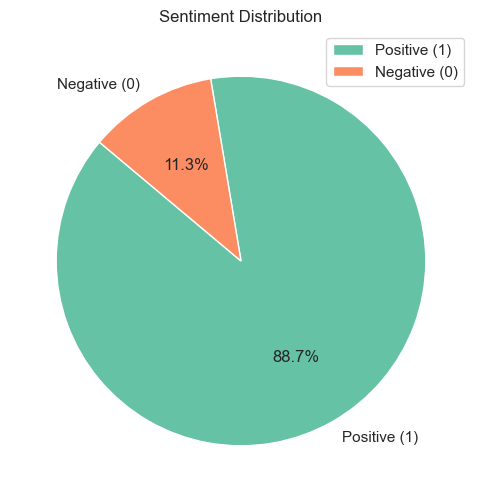

In [361]:
sentiment_counts = df['sentiment'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 6))
colors = sns.color_palette("Set2")
plt.pie(sentiment_counts, labels=['Positive (1)', 'Negative (0)'], colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Sentiment Distribution")
plt.legend(['Positive (1)', 'Negative (0)'], loc='upper right')

plt.show()

In [363]:
from sklearn.model_selection import train_test_split
# Features (X) and labels (y)
X = df['text'].dropna() 
y = df['sentiment']   # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [364]:
print('X_train first entry:\n\n', X_train.iloc[0])
print('\n\nX_train shape: ', X_train.shape)

X_train first entry:

 I was visiting the Tinley park location to put money in the ATM. Their ATM took all my money and never deposited it. Now, I'm late paying my car note while $410 is jammed into my ATM. Now they are doing a 10 business day investigation. If the branch get off their butt to check their own ATMs and check the cameras, I will be on there pissed due to their machine eating my money and not depositing it. They will see the money and the facts if they investigate. Just plain lazy!!


X_train shape:  (14384,)


In [365]:
from sklearn.feature_extraction.text import CountVectorizer
# fit the countvectorizer to the training data: 
vect = CountVectorizer().fit(X_train)

In [366]:
# vect.get_feature_names()[:20]
feature_names = vect.get_feature_names_out()
print(feature_names[:20])

['00' '000' '0000' '000000' '0000000' '00000000' '00001' '0001' '0002'
 '0066950' '008' '00am' '00ish' '00pm' '00s' '01' '010' '0100' '01st' '02']


In [367]:
# len(vect.get_feature_names())

In [368]:
# transform the documents in the training data to a document-term matrix
X_train_vectorized = vect.transform(X_train)

X_train_vectorized

<14384x17414 sparse matrix of type '<class 'numpy.int64'>'
	with 960786 stored elements in Compressed Sparse Row format>

In [369]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vectorized, y_train)

LogisticRegression(max_iter=1000)

In [370]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score

# Predict the transformed test documents
predictions = model.predict(vect.transform(X_test))
print("The evaluation for Logistic Regression")
acc1 = accuracy_score(y_test, predictions) * 100
print('Acurracy: ', accuracy_score(y_test, predictions) * 100)
prec1 = precision_score(y_test, predictions) * 100
print("The precision is {}".format(prec1)) 
  
rec1 = recall_score(y_test, predictions)  * 100
print("The recall is {}".format(rec1)) 
  
f1_lr = f1_score(y_test, predictions) * 100
print("The F1-Score is {}".format(f1_lr)) 

metrics_array = np.empty((0, 4), float)  
accuracy_val = acc1
precision_val = prec1
recall_val = rec1
f1_score_val = f1_lr

metrics_array = np.append(metrics_array, np.array([[accuracy_val, precision_val, recall_val, f1_score_val]]), axis=0)


Acurracy:  95.07820646506778
The precision is 83.19672131147541
The recall is 72.5
The F1-Score is 77.48091603053436


In [371]:
# get the feature names as numpy array
feature_names = vect.get_feature_names_out()

# Sort the coefficients from the model
sorted_coef_index = model.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1] 
# so the list returned is in order of largest to smallest
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['worst' 'rude' 'horrible' 'declined' 'nightmare' 'awful' 'unless'
 'charging' 'poor' 'likely']

Largest Coefs: 
['thank' 'love' 'easy' 'pleased' 'helped' 'helpful' 'great' 'happy' '1099'
 'best']


In [372]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_vectorized, y_train)

#Predict the response for test dataset
predictions = clf.predict(vect.transform(X_test))

In [373]:
print("The evaluation for SVM")
acc2 = accuracy_score(y_test, predictions) * 100
print("Accuracy:", accuracy_score(y_test, predictions) * 100)
prec2 = precision_score(y_test, predictions) * 100
print("The precision is {}".format(prec2)) 
  
rec2 = recall_score(y_test, predictions)  * 100
print("The recall is {}".format(rec2)) 
  
f1_svm = f1_score(y_test, predictions) * 100
print("The F1-Score is {}".format(f1_svm)) 

accuracy_val = acc2
precision_val = prec2
recall_val = rec2
f1_score_val = f1_svm

metrics_array = np.append(metrics_array, np.array([[accuracy_val, precision_val, recall_val, f1_score_val]]), axis=0)


Accuracy: 93.61835245046923
The precision is 73.17518248175182
The recall is 71.60714285714286
The F1-Score is 72.38267148014441


In [374]:
# K-nearest neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_vectorized, y_train)
knn_predictions = knn.predict(vect.transform(X_test))
print("The evaluation for knn")
acc3 = accuracy_score(y_test, knn_predictions) * 100
print("Accuracy:", accuracy_score(y_test, knn_predictions) * 100)
prec3 = precision_score(y_test, knn_predictions) * 100
print("The precision is {}".format(prec1)) 
  
rec3 = recall_score(y_test, knn_predictions)  * 100
print("The recall is {}".format(rec1)) 
  
f1_knn = f1_score(y_test, knn_predictions) * 100
print("The F1-Score is {}".format(f1_dt)) 

accuracy_val = acc3
precision_val = prec3
recall_val = rec3
f1_score_val = f1_knn

metrics_array = np.append(metrics_array, np.array([[accuracy_val, precision_val, recall_val, f1_score_val]]), axis=0)


The evaluation for knn
Accuracy: 80.18769551616268
The precision is 83.19672131147541
The recall is 72.5
The F1-Score is 37.33509234828497


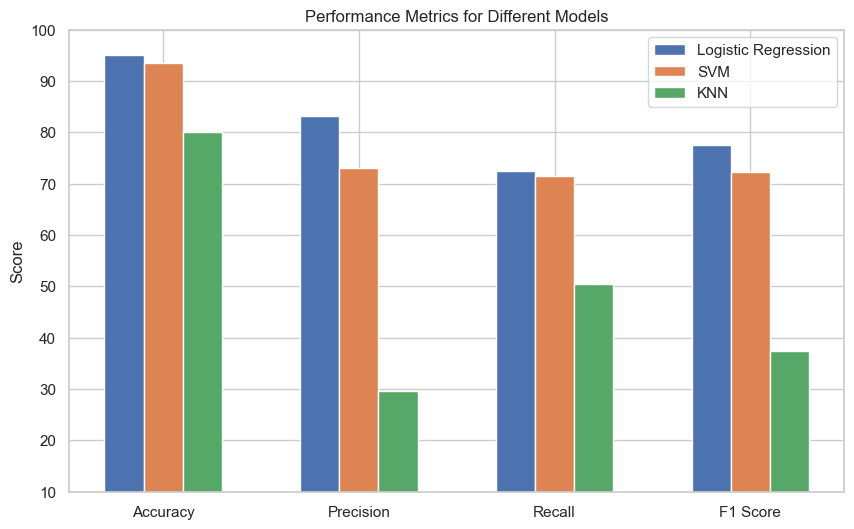

Metrics Array:
[[95.07820647 83.19672131 72.5        77.48091603]
 [93.61835245 73.17518248 71.60714286 72.38267148]
 [80.18769552 29.60251046 50.53571429 37.33509235]]


In [375]:
import matplotlib.pyplot as plt

model_names = ['Logistic Regression', 'SVM', 'KNN']

# Metrics names
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Number of models
num_models = metrics_array.shape[0]

# Set up the bar positions
bar_positions = np.arange(len(metric_names))

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Loop through models
for i in range(num_models):
    ax.bar(bar_positions + i * 0.2, metrics_array[i, :], width=0.2, label=model_names[i])

# Add labels and title
ax.set_xticks(bar_positions + 0.2)
ax.set_xticklabels(metric_names)
ax.set_ylabel('Score')
ax.set_title('Performance Metrics for Different Models')

ax.set_ylim(10, 100)
ax.legend()

# Show the plot
plt.show()

# Print the array
print("Metrics Array:")
print(metrics_array)